In [138]:
import pandas as pd
# To view all rows and columns while displaying as df
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [139]:
# Read in th FullRaw
fullraw=pd.read_csv("PropertyPrice_Data.csv")
fullraw.head()
fullraw.shape

(1459, 26)

In [140]:
# check for the null values
fullraw.isna().sum()

Id                            0
Road_Type                     0
Property_Shape                0
House_Type                    0
House_Condition               0
Construction_Year             0
Remodel_Year                  0
BsmtFinSF1                    0
Total_Basement_Area           0
Air_Conditioning              0
First_Floor_Area              0
Second_Floor_Area             0
LowQualFinSF                  0
Underground_Full_Bathroom     0
Full_Bathroom_Above_Grade     0
Bedroom_Above_Grade           0
Kitchen_Quality               0
Rooms_Above_Grade             0
Fireplaces                    0
Garage                       81
Garage_Built_Year            81
Garage_Area                   0
Pool_Area                     0
Miscellaneous_Value           0
Year_Sold                     0
Sale_Price                    0
dtype: int64

In [141]:
# Imputaing the null values in our dataframe

In [142]:
fullraw['Garage'].fillna(fullraw['Garage'].mode()[0],inplace=True)

In [143]:
fullraw['Garage_Built_Year'].fillna(fullraw['Garage_Built_Year'].median(),inplace=True)

In [144]:
fullraw.isna().sum()

Id                           0
Road_Type                    0
Property_Shape               0
House_Type                   0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
BsmtFinSF1                   0
Total_Basement_Area          0
Air_Conditioning             0
First_Floor_Area             0
Second_Floor_Area            0
LowQualFinSF                 0
Underground_Full_Bathroom    0
Full_Bathroom_Above_Grade    0
Bedroom_Above_Grade          0
Kitchen_Quality              0
Rooms_Above_Grade            0
Fireplaces                   0
Garage                       0
Garage_Built_Year            0
Garage_Area                  0
Pool_Area                    0
Miscellaneous_Value          0
Year_Sold                    0
Sale_Price                   0
dtype: int64

In [145]:
# droping the ID column as it has no signifiacance for machine
fullraw.drop(['Id'],axis=1,inplace=True)
fullraw.shape

(1459, 25)

In [146]:
# Dummy Variable Creation
fullraw=pd.get_dummies(fullraw) # Source column will create two columns Source_Train, Source_Test
fullraw.head()  # Validation

,House_Condition,Construction_Year,Remodel_Year,BsmtFinSF1,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Underground_Full_Bathroom,Full_Bathroom_Above_Grade,Bedroom_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Area,Pool_Area,Miscellaneous_Value,Year_Sold,Sale_Price,Road_Type_Gravel,Road_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,House_Type_1Fam,House_Type_2fmCon,House_Type_Duplex,House_Type_Twnhs,House_Type_TwnhsE,Air_Conditioning_N,Air_Conditioning_Y,Kitchen_Quality_Ex,Kitchen_Quality_Fa,Kitchen_Quality_Gd,Kitchen_Quality_TA,Garage_2TFes,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd
0,5,2003,2003,706,856,856,854,0,1,2,3,8,0,2003.0,1085.793744,0,0,2008,208500,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,8,1976,1976,978,1262,1262,0,0,0,2,3,6,1,1976.0,196.316304,0,0,2007,181500,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,5,2001,2002,486,920,920,866,0,1,2,3,6,1,2001.0,218.068403,0,0,2008,223500,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,5,1915,1970,216,756,961,756,0,1,1,3,7,1,1998.0,696.996439,0,0,2006,140000,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,5,2000,2000,655,1145,1145,1053,0,1,2,4,9,1,2000.0,568.859882,0,0,2008,250000,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [147]:
X=fullraw.drop(['Sale_Price'],axis=1).copy()
y=fullraw['Sale_Price'].copy()


In [148]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: Sale_Price, Length: 1459, dtype: int64

In [149]:
print(X.shape,y.shape)

(1459, 42) (1459,)


In [150]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(X,y,train_size=0.8,random_state=123)
print(trainX.shape,testX.shape)
print(trainY.shape,testX.shape)

(1167, 42) (292, 42)
(1167,) (292, 42)


In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
lr=LinearRegression()
lr.fit(trainX,trainY)

LinearRegression()

In [153]:
predY=lr.predict(testX)

In [154]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [4]:
# function to validate our model
def validation(test,pred,data):
    r2=r2_score(test,pred)
    n=data.shape[0]
    k=data.shape[1]
    adj_2=1-(((n-1)/(n-k-1))*(1-r2))
    
    print("R Square :",r2)
    print("Adj. R Square :",adj_2)
    print("Mean Square Error :",mean_squared_error(test,pred))
    print("Root Mean Square Error :",(mean_squared_error(test,pred)**0.5))
    print("Mean Absolute Percentage Error :",mean_absolute_percentage_error(test,pred))
    
    

In [156]:
validation(testY,predY,fullraw)

R Square : 0.822227620970654
Adj. R Square : 0.8168253507952039
Mean Square Error : 1101225442.8179898
Root Mean Square Error : 33184.7170067486
Mean Absolute Percentage Error : 0.11374655661206219


# Standardize train and tests  data using train mertices

In [157]:
from sklearn.preprocessing import StandardScaler

Train_Scaling = StandardScaler().fit(trainX)    
# Train Scaling contains means,std_dev of training datset, it calculated mean and std of train data only
Train_Standardized = Train_Scaling.transform(trainX)     # This step is stadardizes the train data
Test_Standardized = Train_Scaling.transform(testX)       # This step standardized the test data


# ADd the columns names to Train_X_Std,Test_X_Std
Train_Standardized= pd.DataFrame(Train_Standardized,columns= trainX.columns)
Test_Standardized=pd.DataFrame(Test_Standardized,columns=testX.columns)

In [158]:
Test_Standardized.head(2)

,House_Condition,Construction_Year,Remodel_Year,BsmtFinSF1,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Underground_Full_Bathroom,Full_Bathroom_Above_Grade,Bedroom_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Area,Pool_Area,Miscellaneous_Value,Year_Sold,Road_Type_Gravel,Road_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,House_Type_1Fam,House_Type_2fmCon,House_Type_Duplex,House_Type_Twnhs,House_Type_TwnhsE,Air_Conditioning_N,Air_Conditioning_Y,Kitchen_Quality_Ex,Kitchen_Quality_Fa,Kitchen_Quality_Gd,Kitchen_Quality_TA,Garage_2TFes,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd
0,-0.515029,0.992289,0.781521,-0.960713,-0.392843,-0.713300,1.842731,-0.120969,-0.812685,0.78377,0.157470,0.887762,0.618146,0.939168,-1.150039,-0.076878,-0.086768,1.603299,-0.071889,0.071889,1.459002,-0.162435,-0.083081,-1.356251,0.450658,-0.147957,-0.200267,-0.17841,-0.290813,-0.263933,0.263933,-0.256424,-0.159635,1.211293,-1.016416,-0.050767,0.0,-1.400689,-0.117902,4.151430,-0.083081,-0.592195
1,-3.166670,-2.330197,-1.697627,-0.960713,0.077433,-0.182191,0.761914,-0.120969,1.099418,0.78377,1.358564,0.887762,-0.953480,-2.419770,0.698554,-0.076878,-0.086768,-1.389184,-0.071889,0.071889,-0.685400,-0.162435,-0.083081,0.737327,0.450658,-0.147957,-0.200267,-0.17841,-0.290813,3.788834,-3.788834,-0.256424,-0.159635,-0.825564,0.983849,-0.050767,1.0,-1.400689,-0.117902,-0.240881,-0.083081,-0.592195


In [159]:
Train_Standardized.head(2)
#Train_Scaling

,House_Condition,Construction_Year,Remodel_Year,BsmtFinSF1,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Underground_Full_Bathroom,Full_Bathroom_Above_Grade,Bedroom_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Area,Pool_Area,Miscellaneous_Value,Year_Sold,Road_Type_Gravel,Road_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,House_Type_1Fam,House_Type_2fmCon,House_Type_Duplex,House_Type_Twnhs,House_Type_TwnhsE,Air_Conditioning_N,Air_Conditioning_Y,Kitchen_Quality_Ex,Kitchen_Quality_Fa,Kitchen_Quality_Gd,Kitchen_Quality_TA,Garage_2TFes,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd
0,-0.515029,0.729122,0.392635,1.158719,0.639089,0.515046,2.124385,-0.120969,1.099418,0.783770,1.358564,1.494686,0.618146,0.607421,-0.367566,-0.076878,-0.086768,0.855178,-0.071889,0.071889,-0.685400,-0.162435,-0.083081,0.737327,0.450658,-0.147957,-0.200267,-0.17841,-0.290813,-0.263933,0.263933,-0.256424,-0.159635,1.211293,-1.016416,-0.050767,0.0,0.713934,-0.117902,-0.240881,-0.083081,-0.592195
1,0.368852,-0.356443,0.100970,0.314812,0.186644,0.658521,-0.792906,-0.120969,-0.812685,-1.031031,0.157470,0.280839,2.189772,-0.761035,0.017782,-0.076878,-0.086768,-0.641063,-0.071889,0.071889,1.459002,-0.162435,-0.083081,-1.356251,0.450658,-0.147957,-0.200267,-0.17841,-0.290813,-0.263933,0.263933,-0.256424,-0.159635,1.211293,-1.016416,-0.050767,0.0,0.713934,-0.117902,-0.240881,-0.083081,-0.592195


# Feature Selection through PCA


In [160]:
from sklearn.decomposition import PCA
PCA_Model=PCA(n_components=.9).fit(Train_Standardized)
# n_component=0.90: 90% Variance to be caputured
# if n_components<1 will act as % variance to be captured using PCA
# if n_components>=1, will act as no. of PCs to be created using PCA


In [161]:
# coefficient understanding
len(PCA_Model.components_)   # Total PCs found to explain 90% of data

24

In [162]:
PCA_Model.components_
# coefficient of Linear Equations(Eigen Vector)

array([[-0.0702696 ,  0.31890624,  0.27717908, ...,  0.07526326,
        -0.04204792, -0.24842537],
       [ 0.05490571, -0.13590524, -0.02659843, ...,  0.2315297 ,
        -0.0331762 ,  0.0693679 ],
       [-0.14261537, -0.0830418 , -0.17999118, ..., -0.10459033,
         0.11232628, -0.07787145],
       ...,
       [ 0.23778675, -0.07132313,  0.07331395, ...,  0.08264878,
         0.25266186, -0.26543329],
       [-0.05690963, -0.04521981, -0.14842938, ..., -0.03287967,
        -0.03161304,  0.12876889],
       [-0.24205945, -0.03183682, -0.11465989, ..., -0.11779137,
         0.20013637,  0.0877277 ]])

In [163]:
PCA_Model.components_.shape


(24, 42)

In [164]:
PCA_Model.explained_variance_

array([5.91349598, 3.03435948, 2.58350877, 2.41761948, 1.96936146,
       1.87032124, 1.59589519, 1.49726694, 1.35532918, 1.2225951 ,
       1.19060374, 1.15994243, 1.08251501, 1.06942971, 1.05455424,
       1.01723295, 0.98912527, 0.94855931, 0.93820262, 0.91248719,
       0.8885094 , 0.83134353, 0.81984955, 0.77171204])

In [165]:
PCA_Model.explained_variance_ratio_

array([0.14410802, 0.07394535, 0.06295841, 0.0589158 , 0.04799205,
       0.0455785 , 0.03889092, 0.03648741, 0.03302848, 0.02979384,
       0.02901423, 0.02826704, 0.02638018, 0.0260613 , 0.02569879,
       0.0247893 , 0.02410433, 0.02311577, 0.02286338, 0.02223671,
       0.02165239, 0.0202593 , 0.0199792 , 0.01880612])

In [166]:
import numpy as np
np.cumsum(PCA_Model.explained_variance_ratio_)

array([0.14410802, 0.21805337, 0.28101178, 0.33992758, 0.38791963,
       0.43349813, 0.47238905, 0.50887646, 0.54190495, 0.57169879,
       0.60071302, 0.62898005, 0.65536023, 0.68142153, 0.70712033,
       0.73190963, 0.75601396, 0.77912973, 0.80199311, 0.82422983,
       0.84588222, 0.86614152, 0.88612071, 0.90492683])

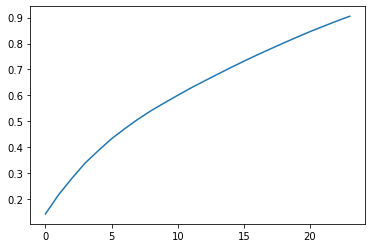

In [167]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(PCA_Model.explained_variance_ratio_))

# Regression Models

In [1]:
# funnction to apply differnet model 
def different_model(model,no_pca):
    pca = PCA(n_components=no_pca)
    X_train_trf = pca.fit_transform(trainX)
    X_test_trf = pca.transform(testX)
    
    ml=model()
    
    ml.fit(X_train_trf,trainY)
    
    predY = ml.predict(X_test_trf)
    
    validation(testY,predY,fullraw)
    
    

In [171]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [173]:
different_model(DecisionTreeRegressor,24)

R Square : 0.5730339886570861
Adj. R Square : 0.5600590497964887
Mean Square Error : 2644875640.842466
Root Mean Square Error : 51428.35444424083
Mean Absolute Percentage Error : 0.16929954494981933


In [174]:
different_model(RandomForestRegressor,24)

R Square : 0.7711885789798076
Adj. R Square : 0.7642352990477452
Mean Square Error : 1417390934.4667099
Root Mean Square Error : 37648.252741219076
Mean Absolute Percentage Error : 0.11716350541262431


In [175]:
different_model(KNeighborsRegressor,24)

R Square : 0.7412857622094055
Adj. R Square : 0.733423774771246
Mean Square Error : 1602626362.0358906
Root Mean Square Error : 40032.8160642727
Mean Absolute Percentage Error : 0.1545822177432728


In [126]:
different_model(SVR,24)

R Square : -0.07027874295874947
Adj. R Square : -0.10280311465290248
Mean Square Error : 6629928614.832051
Root Mean Square Error : 81424.37359189232
Mean Absolute Percentage Error : 0.2986302724563088


In [184]:
different_model(LinearRegression,24)

R Square : 0.8057588198511932
Adj. R Square : 0.7998560843413709
Mean Square Error : 1203242769.1567783
Root Mean Square Error : 34687.78991456184
Mean Absolute Percentage Error : 0.12309939361451848


In [185]:
# we select our Linear Regression and random forest model for further study...............